In [1]:
import numpy as np
import DPMechanism as dp
import matplotlib.pyplot as plt
from time import time
from random import random

0 done
1 done
2 done
5 done


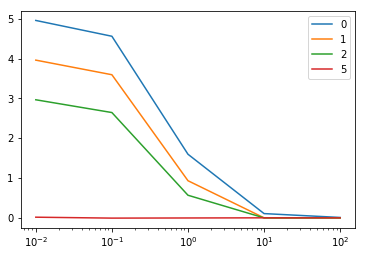

In [2]:
samples = 100000
epsilons = [0.01, 0.1, 1, 10, 100]
values = [0, 1, 2, 5]
upperBound = 10

for _value in values:
    results = np.zeros_like(epsilons)

    for _i, _epsilon in enumerate(epsilons):
        vals = np.zeros(samples)
        mech = dp.BoundedLaplaceMechanism().setEpsilon(_epsilon).setSensitivity(1).setBounds(0, upperBound)

        for _j in np.arange(samples):
            vals[_j] = mech.randomise(_value)

        vals -= _value
        results[_i] = vals.mean()

    plt.semilogx(epsilons, results, label=_value)
    print("%g done" % _value)
    
plt.legend()
plt.show()

0 done
1 done
3 done
5 done
7 done
10 done


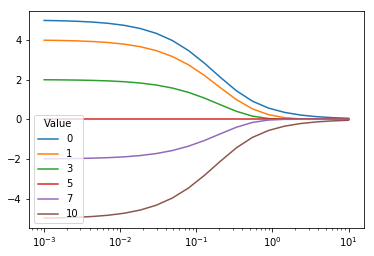

In [12]:
epsilons = np.logspace(-3, 1, 20)
values = [0, 1, 3, 5, 7, 10]
upperBound = 10

for _value in values:
    results = np.zeros_like(epsilons)

    for _i, _epsilon in enumerate(epsilons):
        mech = dp.TruncatedLaplaceMechanism().setEpsilon(_epsilon).setSensitivity(1).setBounds(0, upperBound)

#         for _j in np.arange(len(vals)):
#             vals[_j] = mech.randomise(_value)

#         vals -= _value
        results[_i] = mech.getBias(_value)

    plt.semilogx(epsilons, results, label=_value)
    print("%g done" % _value)
    
plt.legend(title="Value")
plt.show()

Execution times
Pure Laplace: 0.08908653259277344
Truncated Laplace: 0.0046539306640625
Bounded Laplace: 0.09322500228881836
Folded Laplace: 0.0042765140533447266
Raised Laplace: 91.02095341682434


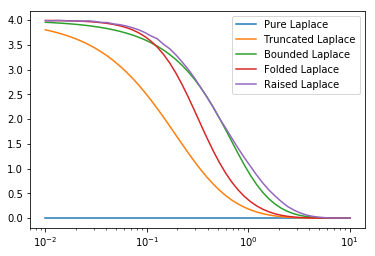

In [51]:
samples = 200000
epsilons = np.logspace(-2, 1, 50)
values = [0, 1, 3, 5, 7, 10]
upperBound = 10
mechanisms = [
             ("Pure Laplace", dp.LaplaceMechanism().setSensitivity(1)),
             ("Truncated Laplace", dp.TruncatedLaplaceMechanism().setSensitivity(1).setBounds(0, upperBound)),
             ("Bounded Laplace", dp.BoundedLaplaceMechanism().setSensitivity(1).setBounds(0, upperBound)),
#              ("Wrong Bounded Laplace", dp.BoundedLaplaceMechanism().setSensitivity(1).setBounds(0, upperBound)),
             ("Folded Laplace", dp.FoldedLaplaceMechanism().setSensitivity(1).setBounds(0, upperBound)),
             ("Raised Laplace", RaisedLaplaceMechanism().setSensitivity(1).setBounds(0, upperBound))]

_value = 1
print("Execution times")

for (label, mech) in mechanisms:
    results = np.zeros_like(epsilons)
    t = time()

    for _i, _epsilon in enumerate(epsilons):
        realMech = mech.copy().setEpsilon(_epsilon)
        
        if label == "Wrong Bounded Laplace":
            realMech.shape = 1/_epsilon
            
        bias = realMech.getBias(_value)
        if (bias == None):
            vals = np.zeros(samples)
            for _j in np.arange(samples):
                vals[_j] = realMech.randomise(_value)

            vals -= _value
            results[_i] = vals.mean()
        else:
            results[_i] = bias

    plt.semilogx(epsilons, results, label=label)
    print(label + ": " + str(time() - t))

plt.legend()
plt.show()

# Determining the bias of the Folded Laplace mechanism

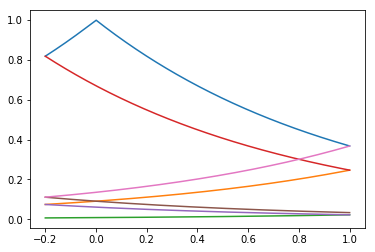

In [6]:
l = -0.2
u = 1
vals = np.linspace(l, u, num=300)

plt.plot(vals, np.exp(-np.abs(vals)))
plt.plot(vals, np.exp(-np.abs(vals - 2*(u-l))))
plt.plot(vals, np.exp(-np.abs(vals - 4*(u-l))))
plt.plot(vals, np.exp(-np.abs(vals -2*l)))
plt.plot(vals, np.exp(-np.abs(vals -2*l + 2*(u-l))))
plt.plot(vals, np.exp(-np.abs(vals + 2*(u-l))))
plt.plot(vals, np.exp(-np.abs(vals -2*u)))
plt.show()

In [83]:
np.trapz(np.exp(-np.abs(vals)), vals) + np.trapz(np.exp(-np.abs(vals - 2*(u-l))), vals)\
    + np.trapz(np.exp(-np.abs(vals -2*l)), vals) + np.trapz(np.exp(-np.abs(vals + 2*(u-l))), vals)\
    + np.trapz(np.exp(-np.abs(vals -2*u)), vals)

1.8923395902422449

In [15]:
vals = np.linspace(l, u, num=3)
total = 0.0
total += np.trapz(np.exp(-np.abs(vals)), vals)

cum = 1
i = 1
while cum > 0:
    cum = np.trapz(np.exp(-np.abs(vals - 2 * i * (u - l))), vals)
    total += cum
    i += 1

cum = 1
i = 1
while cum > 0:
    cum = np.trapz(np.exp(-np.abs(vals + 2 * i * (u - l))), vals)
    total += cum
    i += 1

cum = 1
i = 0
while cum > 0:
    cum = np.trapz(np.exp(-np.abs(vals - 2 * l + 2 * i * (u - l))), vals)
    total += cum
    i += 1

cum = 1
i = 0
while cum > 0:
    cum = np.trapz(np.exp(-np.abs(vals - 2 * u - 2 * i * (u - l))), vals)
    total += cum
    i += 1
    
(total/2, i)

(0.9900859052898373, 311)

In [93]:
np.trapz(np.exp(-np.abs(vals - 2 * u - 2 * 309 * (u - l))), vals)

0.0

In [101]:
np.exp(-l)*(l+1) - np.exp(-u)*(u+1)

0.2413633241852513

In [9]:
vals[0:10]

array([-0.2      , -0.1999996, -0.1999992, -0.1999988, -0.1999984,
       -0.199998 , -0.1999976, -0.1999972, -0.1999968, -0.1999964])

# Variance comparison

In [3]:
hasattr(dp.BoundedLaplaceMechanism(), "setBounds")

True

In [45]:
mechs = [dp.LaplaceMechanism(), dp.BoundedLaplaceMechanism(), dp.FoldedLaplaceMechanism(), dp.TruncatedLaplaceMechanism(), RaisedLaplaceMechanism()]
mechNames = ["Native", "Bounded", "Folded", "Truncated", "Raised"]
for mech in mechs:
    mech.setSensitivity(1).setEpsilon(2)
    
    if hasattr(mech, "setBounds"):
        mech.setBounds(0, 1)

In [46]:
samples = 1000
xVals = np.linspace(0, 1, num=100)
stdevs = np.zeros((len(mechs), len(xVals)))

for _j, x in enumerate(xVals):
    for _i, mech in enumerate(mechs):
        _vals = [mech.randomise(x) for _ in [0] * samples]
        stdevs[_i, _j] = np.std(_vals)

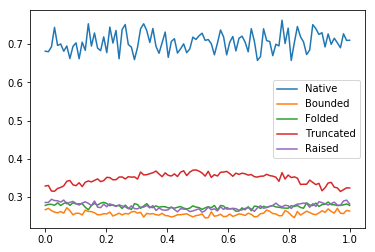

In [47]:
for i in range(len(mechs)):
#     if i == 0: continue
    plt.plot(xVals, stdevs[i, :],label=mechNames[i])
plt.legend()

In [48]:
class RaisedLaplaceMechanism(dp.LaplaceMechanism, dp.TruncationMachine):
    def __init__(self):
        super().__init__()
        dp.TruncationMachine.__init__(self)
        
    def getBias(self, value):
        return None

    def randomise(self, value):
        dp.TruncationMachine.checkInputs(self, value)

        noisyValue = super().randomise(value)
        
        if noisyValue < self.lowerBound or noisyValue > self.upperBound:
            return random() * (self.upperBound - self.lowerBound) + self.lowerBound
        
        return noisyValue

## Plot of $\mathbb{E}[X^2]$

In [22]:
l = 0
u = 1
eps = 0.5
x = np.linspace(0, 1, 100)
b1 = 1

truncLaplace = x**2 + b1 * (l * np.exp((l - x) / b1) - u * np.exp((x - u) / b1)) \
                + (b1 ** 2) * (2 - np.exp((l - x) / b1) - np.exp((x - u) / b1))

In [82]:
simulatedExpectationTrunc = [np.mean([(mech.randomise(_x)) ** 2 for i in [0] * 10000]) for _x in x]

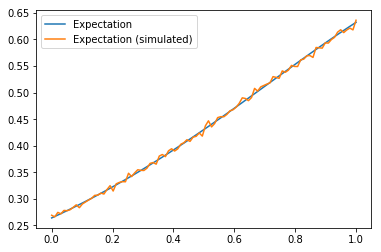

In [83]:
plt.plot(x, truncLaplace, label="Expectation")
plt.plot(x, simulatedExpectationTrunc, label="Expectation (simulated)")
plt.legend()

In [24]:
mech = dp.TruncatedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(0.5)
mech.getBias(0.5)

0.0

In [15]:
biases = np.array([mech.getBias(_x) for _x in x])

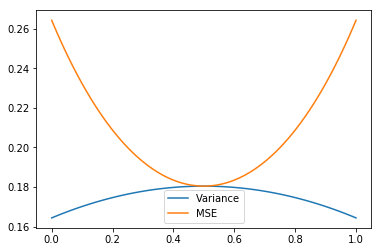

In [16]:
plt.plot(x, truncLaplace - (biases + x)**2, label="Variance")
plt.plot(x, truncLaplace - (biases + x)**2 + biases**2, label="MSE")
plt.legend()

In [39]:
mechBounded = dp.BoundedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(0.5)

In [84]:
epsPrime = mechBounded.getEffectiveEpsilon()
b2 = 0.5 / epsPrime

In [85]:
b2

1.4573218243265624

In [86]:
boundedLaplace = (x**2 \
                  - (np.exp((l - x) / b2) * l * l + np.exp((x - u) / b2) * u * u) / 2 \
                  + b2 * (l * np.exp((l - x) / b2) - u * np.exp((x - u) / b2)) \
                  + (b2 ** 2) * (2 - np.exp((l - x) / b2) - np.exp((x - u) / b2))) / \
                  (1 - (np.exp(-(x - l) / b2) + np.exp(-(u - x) / b2)) / 2)

In [87]:
simulatedExpectation = [np.mean([(mechBounded.randomise(_x)) ** 2 for i in [0] * 10000]) for _x in x]
simulatedBias = [np.mean([(mechBounded.randomise(_x)) for i in [0] * 100]) - _x for _x in x]

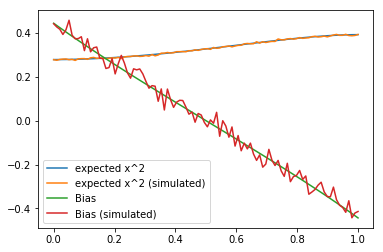

In [88]:
plt.plot(x, boundedLaplace, label="expected x^2")
plt.plot(x, simulatedExpectation, label="expected x^2 (simulated)")
plt.plot(x, biasesBounded, label="Bias")
plt.plot(x, simulatedBias, label="Bias (simulated)")
plt.legend()

In [44]:
biasesBounded = np.array([mechBounded.getBias(_x) for _x in x])

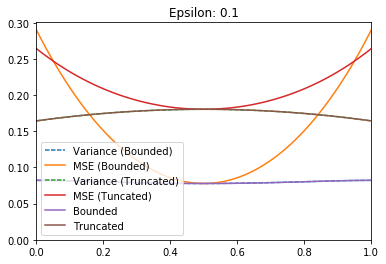

In [9]:
eps = 0.1
delQ = 0.1

l = 0
u = 1

mech = dp.TruncatedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(delQ)
mechBounded = dp.BoundedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(delQ)

b1 = delQ / eps
truncLaplace = x**2 + b1 * (l * np.exp((l - x) / b1) - u * np.exp((x - u) / b1)) \
                + (b1 ** 2) * (2 - np.exp((l - x) / b1) - np.exp((x - u) / b1))
biases = np.array([mech.getBias(_x) for _x in x])
    
b2 = delQ / mechBounded.getEffectiveEpsilon()
boundedLaplace = (x**2 \
                  - (np.exp((l - x) / b2) * l * l + np.exp((x - u) / b2) * u * u) / 2 \
                  + b2 * (l * np.exp((l - x) / b2) - u * np.exp((x - u) / b2)) \
                  + (b2 ** 2) * (2 - np.exp((l - x) / b2) - np.exp((x - u) / b2))) / \
                  (1 - (np.exp(-(x - l) / b2) + np.exp(-(u - x) / b2)) / 2)
biasesBounded = np.array([mechBounded.getBias(_x) for _x in x])

plt.plot(x, boundedLaplace - (biasesBounded + x)**2, dashes=[3,1], label="Variance (Bounded)")
plt.plot(x, boundedLaplace - (biasesBounded + x)**2 + biasesBounded**2, label="MSE (Bounded)")
plt.plot(x, truncLaplace - (biases + x)**2, dashes=[3,1], label="Variance (Truncated)")
plt.plot(x, truncLaplace - (biases + x)**2 + biases**2, label="MSE (Tuncated)")

plt.plot(x, varBounded, label="Bounded")
plt.plot(x, varTruncated, label="Truncated")

plt.ylim(0, None)
plt.xlim(0, 1)
plt.title("Epsilon: %g" % eps)
plt.legend()

In [47]:
biasesBounded[0], biasesBounded[-1]

(0.44326125491238577, -0.44326125491238577)

In [10]:
mechB = dp.BoundedLaplaceMechanism().setEpsilon(0.1).setSensitivity(0.1).setBounds(0, 1)
mechT = dp.TruncatedLaplaceMechanism().setEpsilon(0.1).setSensitivity(0.1).setBounds(0, 1)
mechN = dp.LaplaceMechanism().setEpsilon(0.1).setSensitivity(0.1)

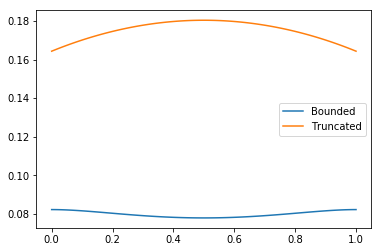

In [25]:
x = np.linspace(0, 1, 100)

varBounded = np.array([mechB.getVariance(_x) for _x in x ])
varTruncated = np.array([mechT.getVariance(_x) for _x in x ])
varNative = np.array([mechN.getVariance(_x) for _x in x])

plt.plot(x, varBounded, label="Bounded")
plt.plot(x, varTruncated, label="Truncated")
# plt.plot(x, varNative, label="Native")
plt.legend()

In [23]:
epsilons = np.logspace(-3, 1, 100)

mechs = [dp.BoundedLaplaceMechanism().setSensitivity(0.1).setBounds(0,1), 
         dp.TruncatedLaplaceMechanism().setSensitivity(0.1).setBounds(0,1)]
names=["Bounded", "Truncated"]

vals = [[mech.deepcopy().setEpsilon(eps).getVariance(0.5) for eps in epsilons] for mech in mechs]

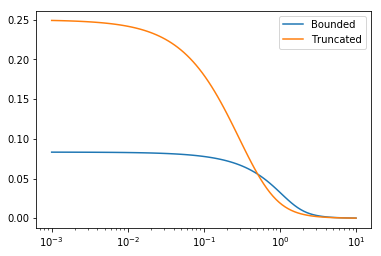

In [24]:
for i in range(len(mechs)):
    plt.semilogx(epsilons, vals[i], label=names[i])
plt.legend()

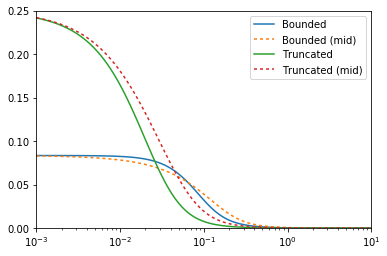

In [70]:
epsilons = np.logspace(-3, 1, 100)

mechs = [dp.BoundedLaplaceMechanism().setSensitivity(0.01).setBounds(0,1), 
         dp.TruncatedLaplaceMechanism().setSensitivity(0.01).setBounds(0,1)]
names=["Bounded", "Truncated"]

vals = [[mech.copy().setEpsilon(eps).getVariance(0) for eps in epsilons] for mech in mechs]
vals2 = [[mech.copy().setEpsilon(eps).getVariance(0.5) for eps in epsilons] for mech in mechs]

for i in range(len(mechs)):
    plt.semilogx(epsilons, vals[i], label=names[i])
    plt.semilogx(epsilons, vals2[i], label=names[i] + " (mid)", dashes=[2,2])
    
plt.ylim(0, 0.25)
plt.xlim(10**-3, 10)
plt.legend()

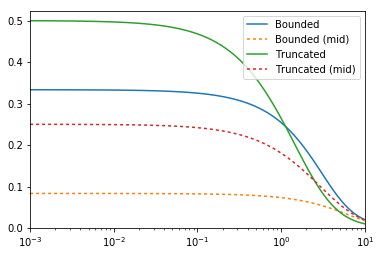

In [53]:
epsilons = np.logspace(-3, 1, 100)

mechs = [dp.BoundedLaplaceMechanism().setSensitivity(1).setBounds(0,1), 
         dp.TruncatedLaplaceMechanism().setSensitivity(1).setBounds(0,1)]
names=["Bounded", "Truncated"]

vals = [[mech.copy().setEpsilon(eps).getMSE(0) for eps in epsilons] for mech in mechs]
vals2 = [[mech.copy().setEpsilon(eps).getMSE(0.5) for eps in epsilons] for mech in mechs]

for i in range(len(mechs)):
    plt.semilogx(epsilons, vals[i], label=names[i])
    plt.semilogx(epsilons, vals2[i], label=names[i] + " (mid)", dashes=[2,2])
    
plt.ylim(0, None)
plt.xlim(10**-3, 10)
plt.legend()

In [64]:
eps = 1
delQ = 0.1

l = 0
u = 1

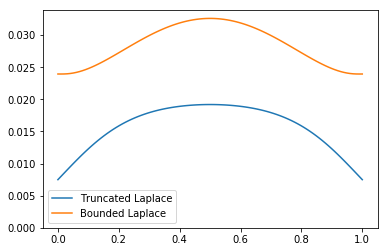

In [65]:
mechs = [(dp.TruncatedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(delQ), "Truncated Laplace"),
(dp.BoundedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(delQ), "Bounded Laplace")]

x = np.linspace(l, u, 100)

for (mech, name) in mechs:
    vals = [mech.getVariance(_x) for _x in x]
    plt.plot(x, vals, label=name)
    
plt.ylim(0, None)
plt.legend()

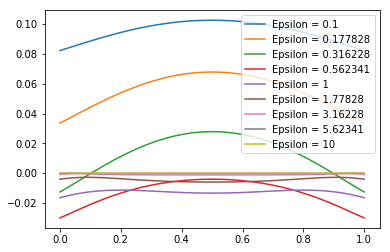

In [60]:
epsilons = np.logspace(-1, 1, 9)
# epsilons[0] = 0.5


for eps in epsilons:
    mechs = [(dp.TruncatedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(delQ), "Truncated Laplace"),
(dp.BoundedLaplaceMechanism().setBounds(l, u).setEpsilon(eps).setSensitivity(delQ), "Bounded Laplace")]

    x = np.linspace(l, u, 100)

    vals = [mechs[0][0].getVariance(_x) - mechs[1][0].getVariance(_x) for _x in x]
    plt.plot(x, vals, label="Epsilon = %g" % eps)
    
plt.legend()

# Variance crosspoint for bounded and truncated Laplace mechanisms

In [11]:
f = lambda sens, eps: dp.TruncatedLaplaceMechanism().setBounds(0, 1).setSensitivity(sens).setEpsilon(eps).getVariance(0.5) - dp.BoundedLaplaceMechanism().setBounds(0, 1).setSensitivity(sens).setEpsilon(eps).getVariance(0.5)

In [57]:
f(1, 3)

0.043582001377712065

In [36]:
def crossover(sens):
    f = lambda sens, eps: dp.TruncatedLaplaceMechanism().setBounds(0, 1).setSensitivity(sens).setEpsilon(eps).getVariance(0.5) - dp.BoundedLaplaceMechanism().setBounds(0, 1).setSensitivity(sens).setEpsilon(eps).getVariance(0.5)
    
    upper = 1
    lower = 1
    mult = 10 if f(sens, lower) >= 0 else 0.1
    x0 = 1

    while True:
        x0 *= mult

        if f(sens, lower) * f(sens, x0) <= 0:
            if f(sens, x0) >= 0:
                lower = x0
                upper = x0 / mult
            if f(sens, x0) <= 0:
                lower = x0 / mult
                upper = x0
            break

    oldIntSize = (upper - lower) * 2

    while (oldIntSize > upper - lower):
        oldIntSize = upper - lower
        middle = (upper + lower) / 2

        if f(sens, middle) >= 0: lower = middle
        if f(sens, middle) <= 0: upper = middle
            
    return middle

In [50]:
sens = np.logspace(-4, 0, 500, endpoint=False)
eps = np.array([crossover(_x) for _x in sens])

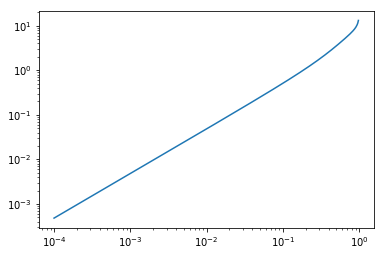

In [51]:
plt.loglog(sens, eps)

(0.06788294368702666, 0.22)

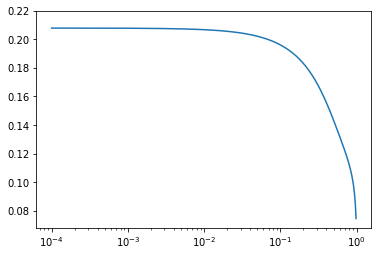

In [52]:
plt.semilogx(sens, sens / eps)
plt.ylim(None, 0.22)